In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=WrMJM5lmUYgdqFUKryUxqB2CObMDbJ&access_type=offline


id                                            joke    origin_id  culture  \
9  1139  Where’s the bin? Dad: I haven’t been anywhere!  9hyAsrzAItc  General   

         category                           description            title  \
9  icanhazdadjoke  A pun involving a bin and a dad joke  Where's the Bin   

  c1_name  c2_name c1_gender  ...                    c1_2  \
9   Child  Grandpa      male  ...  No, the bin for trash.   

                       c2_2                                              n_3  \
9  Oh, it's under the sink.  The child realizes the pun and starts to smile.   

                      c1_3                c2_3  \
9  That's a good one, Dad.  Glad you liked it!   

                                n_4                   c1_4               c2_4  \
9  Both share a moment of laughter.  You're full of jokes.  It's a dad thing!   

                                         script_flow          image_id  
9  [n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...  Ci6I0heAfZNOIppt  

[1 rows x 25 columns]

### Code 101&102: Generate Story and Images

In [5]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

My wife said I was immature. So I told her to get out of my fort.


In [6]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [7]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

# JS.convert_webp_to_png()

### Code 104: SNS Messages

Create the video description like below based on the retrieved story dialog from GitHub.

requests:
[ { "insertText": { "text": "📽️ Video Description 📽️: \nJoin Rex the dog as he tries to make friends with a group of quirky ducks. 😂 Will he succeed, or will the ducks outsmart him? Find out in this hilarious tale of friendship and fun! 🐶🦆\n\n🏫 English Explanation 🗣️: \n 1. Query: A request for information, usually in a database or search engine.\n 2. Miscommunication: When communication goes wrong, often leading to humor in stories.\n 3. Digital: Related to technology or computers, setting the modern scene.\n 4. Search: The act of looking for information online or in a database.\n 5. Prompt: A command or question given to a computer to trigger a response.\n\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지, "location": { "index": 1 } } } ]

In [ ]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1130_TalkingMuffins.json' and branch: 'main'
  - documentId: 1ltHKEfEAEKUWZAi6btfYhycREXU2aeJfKOqWG9Kch7I
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1131_GuitarvsFish.json' and branch: 'main'
  - documentId: 10tn4FdMOZXOR5N3fPP15sKll44KArs2NQUfgcQyZHIk
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1132_SmallMedium.json' and branch: 'main'
  - documentId: 1oX3keIrV-xaDIW9JuXjtKWUVETgndkOYpyQLbpjkUIE
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge 

x

### Video Creation

In [ ]:
# Define ids of video to be generated
ID_LIST = [i for i in range(1130, 1140)]
# Crop mode
CROP_MODE = 'auto'

In [ ]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: CROP_MODE for id_ in ID_LIST})
clip.copy(exp_crop_mode)

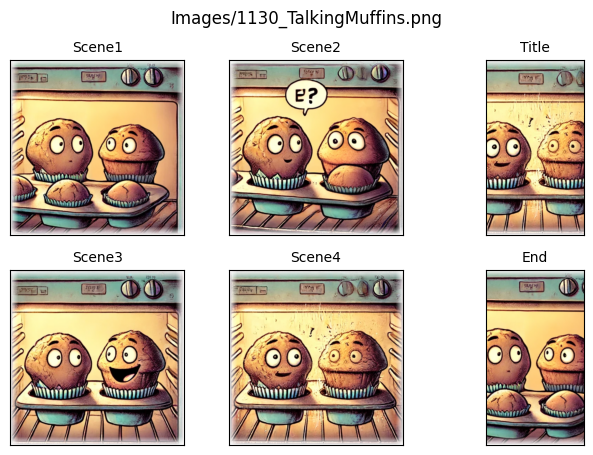

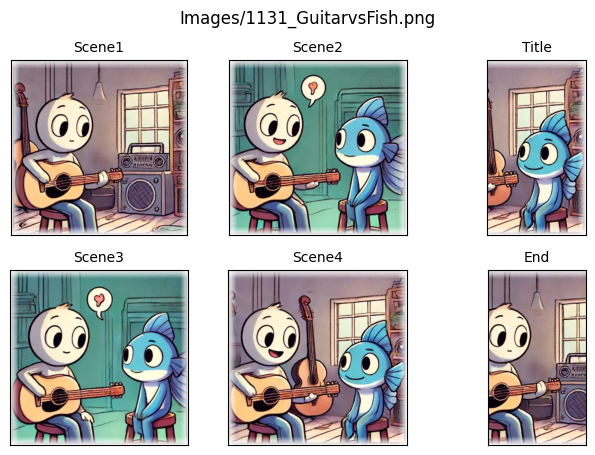

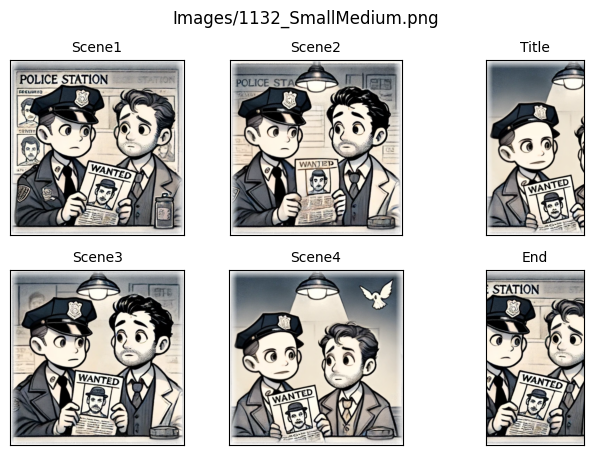

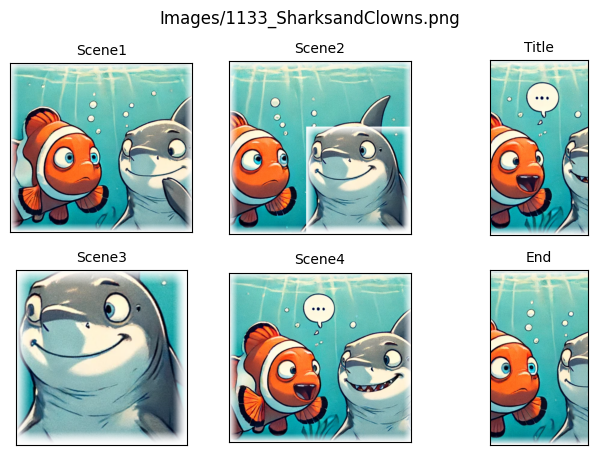

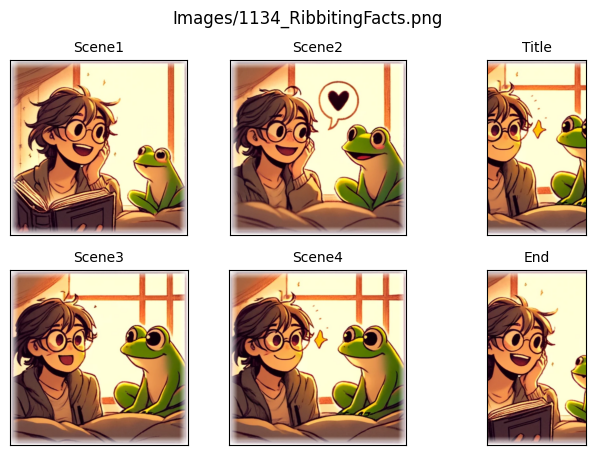

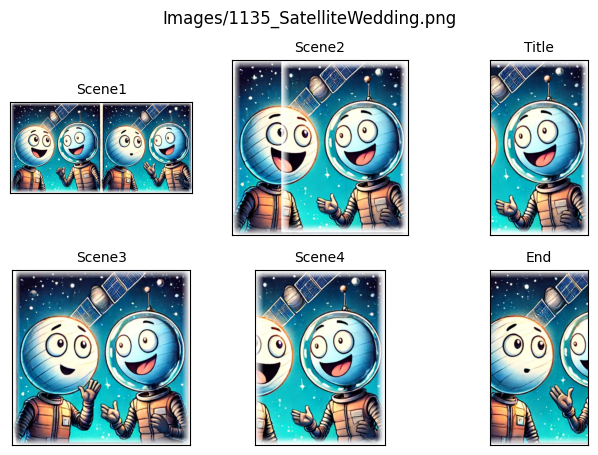

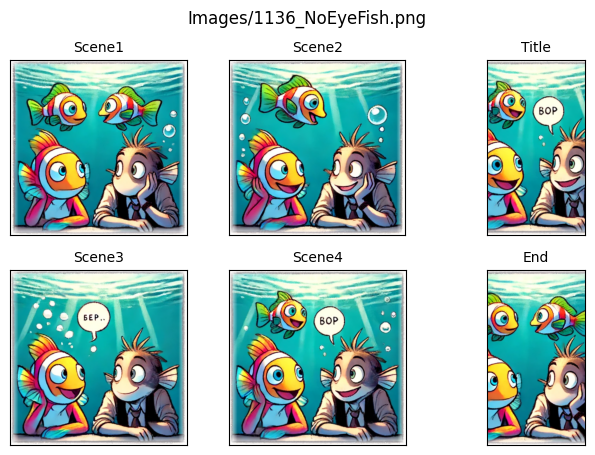

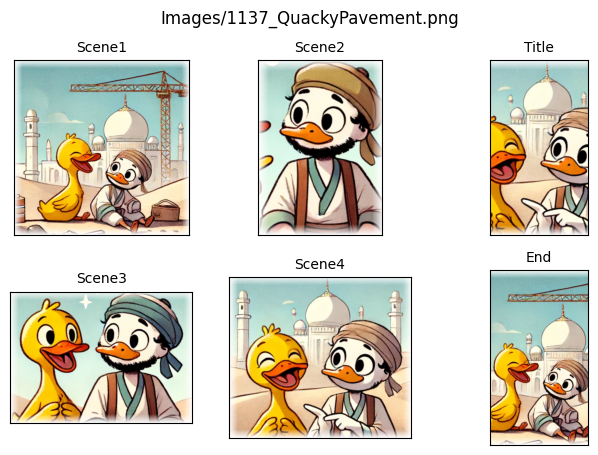

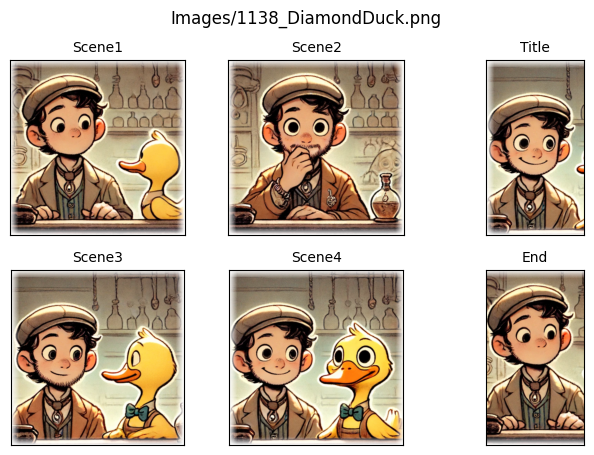

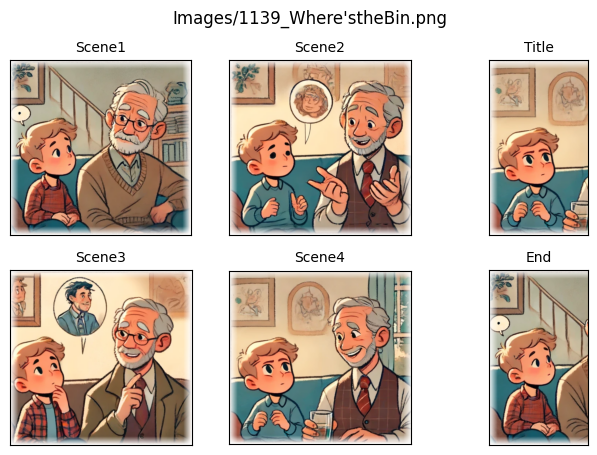

In [ ]:
# Get list of image paths
args = [{'path': f"Images/{p}", 'mode': CROP_MODE} for p in os.listdir('Images') if int(p.split('_')[0]) in ID_LIST]

# Test image cropping
video.image_crop_test(args)

In [ ]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here 'auto' or 'manual'
crop_mode = {1130: 'auto', 1131: 'auto', 1132: 'auto', 1133: 'manual', 1134: 'auto', 1135: 'manual', 1136: 'auto', 1137: 'manual', 1138: 'auto', 1139: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=ID_LIST, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

Moviepy - Building video Videos/1130_TalkingMuffins.mp4.
MoviePy - Writing audio in 1130_TalkingMuffinsTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1130_TalkingMuffins.mp4



Moviepy - Done !
Moviepy - video ready Videos/1130_TalkingMuffins.mp4
Moviepy - Building video Videos/1131_GuitarvsFish.mp4.
MoviePy - Writing audio in 1131_GuitarvsFishTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1131_GuitarvsFish.mp4



Moviepy - Done !
Moviepy - video ready Videos/1131_GuitarvsFish.mp4
Moviepy - Building video Videos/1132_SmallMedium.mp4.
MoviePy - Writing audio in 1132_SmallMediumTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1132_SmallMedium.mp4



Moviepy - Done !
Moviepy - video ready Videos/1132_SmallMedium.mp4
Moviepy - Building video Videos/1133_SharksandClowns.mp4.
MoviePy - Writing audio in 1133_SharksandClownsTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1133_SharksandClowns.mp4



Moviepy - Done !
Moviepy - video ready Videos/1133_SharksandClowns.mp4
Moviepy - Building video Videos/1134_RibbitingFacts.mp4.
MoviePy - Writing audio in 1134_RibbitingFactsTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1134_RibbitingFacts.mp4



Moviepy - Done !
Moviepy - video ready Videos/1134_RibbitingFacts.mp4
Moviepy - Building video Videos/1135_SatelliteWedding.mp4.
MoviePy - Writing audio in 1135_SatelliteWeddingTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1135_SatelliteWedding.mp4



Moviepy - Done !
Moviepy - video ready Videos/1135_SatelliteWedding.mp4
Moviepy - Building video Videos/1136_NoEyeFish.mp4.
MoviePy - Writing audio in 1136_NoEyeFishTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1136_NoEyeFish.mp4



Moviepy - Done !
Moviepy - video ready Videos/1136_NoEyeFish.mp4
Moviepy - Building video Videos/1137_QuackyPavement.mp4.
MoviePy - Writing audio in 1137_QuackyPavementTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1137_QuackyPavement.mp4



Moviepy - Done !
Moviepy - video ready Videos/1137_QuackyPavement.mp4
Moviepy - Building video Videos/1138_DiamondDuck.mp4.
MoviePy - Writing audio in 1138_DiamondDuckTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1138_DiamondDuck.mp4



Moviepy - Done !
Moviepy - video ready Videos/1138_DiamondDuck.mp4
Moviepy - Building video Videos/1139_Where'stheBin.mp4.
MoviePy - Writing audio in 1139_Where'stheBinTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1139_Where'stheBin.mp4



Moviepy - Done !
Moviepy - video ready Videos/1139_Where'stheBin.mp4
['1130_TalkingMuffins', '1131_GuitarvsFish', '1132_SmallMedium', '1133_SharksandClowns', '1134_RibbitingFacts', '1135_SatelliteWedding', '1136_NoEyeFish', '1137_QuackyPavement', '1138_DiamondDuck', "1139_Where'stheBin"]


### Video Schedule Post

In [3]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [4]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


Title  \
0    Joke Story: Talking Muffins   
1      Joke Story: Guitarvs Fish   
2       Joke Story: Small Medium   
3   Joke Story: Sharksand Clowns   
4    Joke Story: Ribbiting Facts   
5  Joke Story: Satellite Wedding   
6        Joke Story: No Eye Fish   
7    Joke Story: Quacky Pavement   
8       Joke Story: Diamond Duck   
9     Joke Story: Where'sthe Bin   

                                             Content  \
0  📽️ Video Description 📽️: \nEver wondered what ...   
1  📽️ Video Description 📽️: \nWhat happens when a...   
2  📽️ Video Description 📽️: \nEver heard of a 'sm...   
3                                                 \n   
4  📽️ Video Description 📽️: \nEver wondered about...   
5  📽️ Video Description 📽️: \nEver seen a wedding...   
6  📽️ Video Description 📽️: \nWhat do you call a ...   
7  📽️ Video Description 📽️: \nEver wondered what ...   
8  📽️ Video Description 📽️: \nWhat happens when a...   
9  📽️ Video Description 📽️: \nWhat happens when a...   

                               Path              Schedule  
0    Videos/1130_TalkingMuffins.mp4  2024-06-17T12:00:00Z  
1      Videos/1131_GuitarvsFish.mp4  2024-06-17T13:00:00Z  
2       Videos/1132_SmallMedium.mp4  2024-06-18T12:00:00Z  
3   Videos/1133_SharksandClowns.mp4  2024-06-18T13:00:00Z  
4    Videos/1134_RibbitingFacts.mp4  2024-06-19T12:00:00Z  
5  Videos/1135_SatelliteWedding.mp4  2024-06-19T13:00:00Z  
6         Videos/1136_NoEyeFish.mp4  2024-06-20T12:00:00Z  
7    Videos/1137_QuackyPavement.mp4  2024-06-20T13:00:00Z  
8       Videos/1138_DiamondDuck.mp4  2024-06-21T12:00:00Z  
9     Videos/1139_Where'stheBin.mp4  2024-06-21T13:00:00Z

In [4]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': '5U75uKrlJRQ'}
{'status': 'success', 'videoId': 'KnSOZX87bH0'}
{'status': 'success', 'videoId': 'tswp8NpYgFA'}
{'status': 'success', 'videoId': 'TmwvR3XYCQ0'}


In [6]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: No Eye Fish', 'Joke Story: Quacky Pavement', 'Joke Story: Diamond Duck', "Joke Story: Where'sthe Bin"]
v_contents = ['📽️ Video Description 📽️: \nWhat do you call a fish with no eyes? 🐟👀 Dive into this pun-filled story of a fish and its friend with a play on words that will make you laugh out loud! 😂 Will they figure out the answer, or will it be a mystery forever? 🐠❓\n\n🏫 English Explanation 🗣️: \n1. Fish: An aquatic animal that lives in water and breathes through gills.\n2. Eyes: The organs that animals use to see.\n3. Pun: A humorous play on words, often involving words that sound similar but have different meanings.\n4. Mystery: Something that is difficult or impossible to understand or explain.\n5. Laugh: To make the sounds and movements of the face and body that show you are happy or amused.\n\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지\n', '📽️ Video Description 📽️

### Code 100: Generate Jokes

#### Joke Prompts

In [ ]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

id  culture   category  \
185  185  General  Valentine   
186  186  General  Valentine   
187  187  General  Valentine   
188  188  General  Valentine   
189  189  General  Valentine   

                                                  joke  
185  What's a chocolate's favorite kind of music on...  
186  Why was the chocolate box nervous on Valentine...  
187  How do chocolates stay fit for Valentine's Day...  
188  What did the chocolate say to the Valentine's ...  
189  Why did the chocolate give his girlfriend a bo...

In [ ]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

id  culture             category  \
157  157  General  Observational humor   
158  158  General       Wordplay jokes   
159  159  General         Animal jokes   
160  160  General         Doctor jokes   
161  161  General     Technology jokes   

                                                  joke  
157  Isn't it funny how we never see snowmen at the...  
158  If April showers bring May flowers, what do Ma...  
159  Why don’t polar bears get married in winter? B...  
160  Why do doctors make the worst snowmen? Because...  
161  Why did the smartphone wear a scarf? Because i...

In [ ]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs